In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("../data/estudiantes_pregrado.csv")
data

,Carrera,201710,201720,201810,201820,201910,201920,202010,202020,202110,202120
0,Administracion,985,989,989,1019,1020,1037,1058,1159,1202,1215
1,Ingenieria Ambiental,416,380,376,357,348,304,267,245,216,187
2,Ingenieria Electrica,123,113,122,120,115,121,110,99,85,83
3,Fisica,212,208,208,210,233,242,279,283,326,329
4,Diseno,761,751,761,765,781,793,795,812,833,828


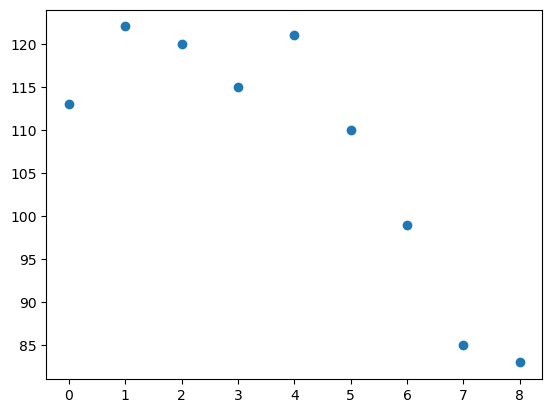

In [104]:
y = np.array(data.iloc[2][-9:])
x = np.arange(len(y))
plt.scatter(x,y)

In [96]:
def find_a_from_data(x, y):
    a, b, c = np.polyfit(x, y, 2)
    return a

def new_data_from_jackknife(x, y):
    n = len(x)
    ids = np.arange(n)
    new_ids = np.random.choice(ids, size=n)
    return x[new_ids], y[new_ids]

def estimate_a_with_uncertainty(x, y, N_iterations=10):
    a_values = np.zeros(N_iterations)
    for i in range(N_iterations):
        new_x, new_y = new_data_from_jackknife(x, y)
        a_values[i] = find_a_from_data(new_x, new_y)
    return a_values.mean(), a_values.std()

In [100]:
for i in range(5):
    y = np.array(np.float_(data.iloc[i][-9:]))
    x = np.arange(len(y))*1.0
    a, sigma_a = estimate_a_with_uncertainty(x, y)
    print(data.iloc[i][0], a, sigma_a)

Administracion 2.9573325427984645 3.579640965564578
Ingenieria Ambiental -1.666876094218578 1.0095477708141654
Ingenieria Electrica -1.243158449692975 0.3540654969458448
Fisica 1.3488370604120576 0.47352314887236896
Diseno 0.11453117442131869 0.2694023180810896
